In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
df=pd.read_csv('height-weight.csv')

In [3]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [4]:
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


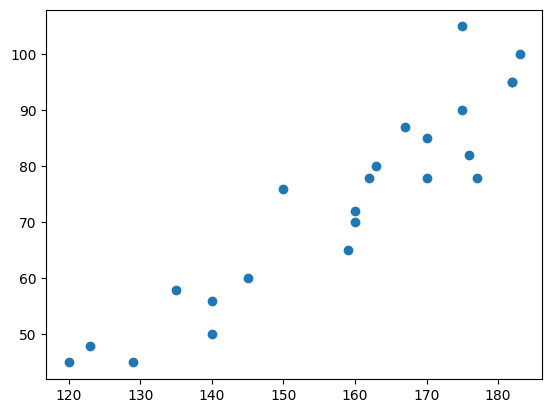

In [5]:
plt.scatter(df['Height'],df['Weight'])

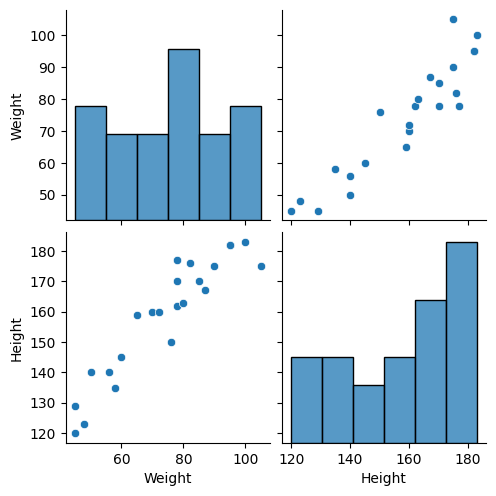

In [6]:
sns.pairplot(df)

In [7]:
x=df['Weight']
y=df['Height']

In [8]:
x

0      45
1      58
2      48
3      60
4      70
5      78
6      80
7      90
8      95
9      78
10     82
11     95
12    105
13    100
14     85
15     78
16     50
17     65
18     76
19     87
20     45
21     56
22     72
Name: Weight, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split
x=df[['Weight']]
y=df['Height']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=22)

In [10]:
x_train.shape

(18,)

In [13]:
#standardiation
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [15]:
x_test

array([[ 1.48095334],
       [ 0.22783897],
       [-1.36703385],
       [ 0.22783897],
       [-0.79743641]])

In [16]:
##apply linear regression
from sklearn.linear_model import LinearRegression
regression=LinearRegression(n_jobs=1)
regression.fit(x_train,y_train)
regression.coef_


array([18.39799721])

In [17]:
print("Coefficient or slope ",regression.coef_)
print("Intercept ",regression.intercept_)

Coefficient or slope  [18.39799721]
Intercept  157.94444444444446


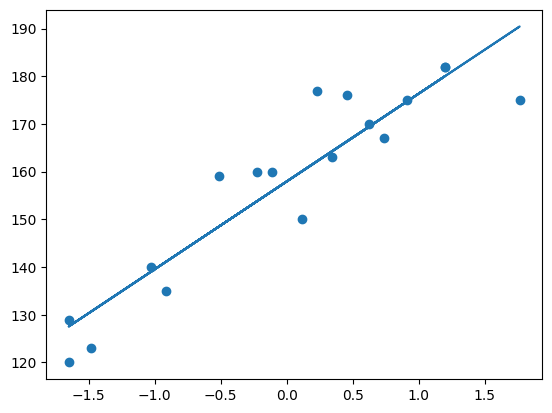

In [ ]:
#ploting 

plt.scatter(x_train,y_train)
plt.plot(x_train,regression.predict(x_train))

In [26]:
y_pred=regression.predict(x_test)
y_pred,y_test

(array([185.19101979, 162.13622527, 132.79375951, 162.13622527,
        143.27321157]),
 13    183
 9     170
 16    140
 5     162
 3     145
 Name: Height, dtype: int64)

In [27]:
#performance matrix
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mqe=mean_absolute_error(y_test,y_pred)
tmse=np.sqrt(mse)
print(mse)
print(mqe)
print(tmse)

24.31395566768363
3.8248097412480946
4.930918339182229


In [28]:
##r2 square 
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
score

0.9033626563287614